In [1]:
import numpy as np
import pandas as pd

## 1) Count the number of product with respect to sub category from dataframe

In [2]:
subCategory = ["clothing",
               "clothing",
               "clothing",
               "car",
               "car",
               "bath & skin care",
               "bath & skin care"]

product = ["frocks",
           "shirt",
           "jeans pant", 
           "ride on car",
           "toy car", 
           "shampoos", 
           "soaps"]


In [3]:
df = pd.DataFrame(np.c_[subCategory, product], columns=['SubCategory', 'Product'])

df

,SubCategory,Product
0,clothing,frocks
1,clothing,shirt
2,clothing,jeans pant
3,car,ride on car
4,car,toy car
5,bath & skin care,shampoos
6,bath & skin care,soaps


In [4]:
df.groupby(by="SubCategory").SubCategory.value_counts()

SubCategory       SubCategory     
bath & skin care  bath & skin care    2
car               car                 2
clothing          clothing            3
Name: SubCategory, dtype: int64

In [5]:
df.groupby(by="SubCategory")["SubCategory"].value_counts()

SubCategory       SubCategory     
bath & skin care  bath & skin care    2
car               car                 2
clothing          clothing            3
Name: SubCategory, dtype: int64

## 2) Create DataFrame with two columns Name, Age. Create age_cat column from age.

age > 35 = senior

age <= 35 = junior

In [6]:
name = ["Alamin", "Nusrat Rita", "Taneem", "Tajnin Sultana", "Joty"]

age = [32,50,43,20,33]

df = pd.DataFrame(np.c_[name, age], columns=['Name', 'Age'])

df

,Name,Age
0,Alamin,32
1,Nusrat Rita,50
2,Taneem,43
3,Tajnin Sultana,20
4,Joty,33


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [8]:
df['Age'] = df['Age'].astype(dtype='int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 188.0+ bytes


In [10]:
df['Age'].apply(lambda a : 'Junior' if a<=35 else 'Senior')

0    Junior
1    Senior
2    Senior
3    Junior
4    Junior
Name: Age, dtype: object

In [11]:
df['Age_cat'] = df['Age'].apply(lambda a : 'Junior' if a<=35 else 'Senior')

df

,Name,Age,Age_cat
0,Alamin,32,Junior
1,Nusrat Rita,50,Senior
2,Taneem,43,Senior
3,Tajnin Sultana,20,Junior
4,Joty,33,Junior


## print the surname from the full name

In [12]:
lis = ["Narendra_Modi", "Rahul_Gandhi ", "Arvind_Kejrival"]

lis

['Narendra_Modi', 'Rahul_Gandhi ', 'Arvind_Kejrival']

In [13]:
result = []

for surname in lis:
    result.append(surname.split("_")[-1].strip())

print(result)

['Modi', 'Gandhi', 'Kejrival']


In [14]:
# Using list comprehension

result2 = [surname.split("_")[-1].strip() for surname in lis]

result2

['Modi', 'Gandhi', 'Kejrival']

## Create Image & Flip It Without special Function

In [15]:
from torch_snippets import show

In [16]:
img = np.random.randint(low=0, high=255, size=(5,5,3), dtype=np.uint8)

img

array([[[ 65,   1, 122],
        [233,  54, 155],
        [ 24, 122,  95],
        [166, 195,  77],
        [ 78, 105, 113]],

       [[183,  74,  63],
        [175, 162, 188],
        [225, 143,  77],
        [238, 226,   4],
        [ 33,  21, 202]],

       [[ 77,  33, 120],
        [ 31, 158, 110],
        [229,   4, 141],
        [202, 151,  97],
        [ 68,  20, 167]],

       [[235,  86, 162],
        [254,  25, 205],
        [193,  91,  62],
        [ 88, 221, 252],
        [ 57, 104, 205]],

       [[ 95, 109,  77],
        [ 80,  63,  10],
        [194, 155, 233],
        [ 11, 135, 127],
        [ 75, 144, 119]]], dtype=uint8)

In [17]:
img.shape

(5, 5, 3)

In [18]:
img.dtype

dtype('uint8')

name 'torch' is not defined


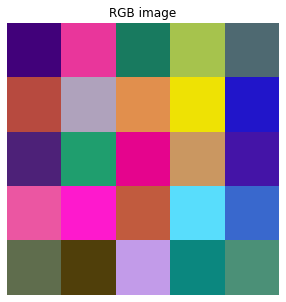

In [19]:
show(img=img, title="RGB image", sz=5)

name 'torch' is not defined


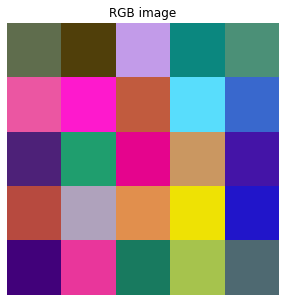

In [20]:
# filp the image

filp_img = np.array(list(reversed(img)))

show(img=filp_img, title="RGB image", sz=5)

## Convert Categorical Data Into Numerical Format without special function

In [21]:
# data 
students = ['alamin', 'nahid', 'mim', 'fatema']
city = ['Dhaka', 'Comilla', 'Sylet', 'Khulna']
marks = ["78", "98", "80", "86"]

In [22]:
df = pd.DataFrame(data=np.c_[students, city, marks], columns=["students", "city", "marks"])
df

,students,city,marks
0,alamin,Dhaka,78
1,nahid,Comilla,98
2,mim,Sylet,80
3,fatema,Khulna,86


In [23]:
df.shape

(4, 3)

In [24]:
df2 = df.copy()

df2

,students,city,marks
0,alamin,Dhaka,78
1,nahid,Comilla,98
2,mim,Sylet,80
3,fatema,Khulna,86


In [25]:
# Create a function

def oneHotencoder(dataFrame, column_name):
    columns = dataFrame[column_name].unique().tolist()
    for column in columns:
        dataFrame[column] = np.nan
    
    for column in columns:
        for i in range(dataFrame.shape[0]):
            cat_val = dataFrame.loc[i, column_name]
            if cat_val == column:
                dataFrame.loc[i, column] = 1
            else:
                dataFrame.loc[i, column] = 0
    return dataFrame

In [26]:
encoded_df = oneHotencoder(df, 'city')

encoded_df

,students,city,marks,Dhaka,Comilla,Sylet,Khulna
0,alamin,Dhaka,78,1.0,0.0,0.0,0.0
1,nahid,Comilla,98,0.0,1.0,0.0,0.0
2,mim,Sylet,80,0.0,0.0,1.0,0.0
3,fatema,Khulna,86,0.0,0.0,0.0,1.0


In [27]:
# Another way

for city_name in df2['city'].unique().tolist():
    df2[city_name] = np.where(df2['city'] == city_name, 1, 0)

In [28]:
df2

,students,city,marks,Dhaka,Comilla,Sylet,Khulna
0,alamin,Dhaka,78,1,0,0,0
1,nahid,Comilla,98,0,1,0,0
2,mim,Sylet,80,0,0,1,0
3,fatema,Khulna,86,0,0,0,1


## Find a Given List is Duplicate or not

In [29]:
# here list_data:list means we pass a list as a parameter and -> bool means this function will return a bool object


def list_duplicate_or_not(list_data:list) -> bool:
    if len(list_data) == len(set(list_data)):
        print("List is not duplicated")
        return True
    else:
        print("List is duplicated")
        return False

In [30]:
list_duplicate_or_not([1,2,3])

List is not duplicated


True

In [31]:
list_duplicate_or_not([1,2,3,3,2])

List is duplicated


False

In [32]:
list_duplicate_or_not([1,2,'a','b','B','c'])

List is not duplicated


True

In [33]:
list_duplicate_or_not([1,2,'a','b','B','B'])

List is duplicated


False

In [34]:
list_duplicate_or_not([' ', '',' '])

List is duplicated


False

In [35]:
list_duplicate_or_not([' ', '',])

List is not duplicated


True